[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/2_Medidas_Principales.ipynb)

# 2.2. Medidas Principales de Tendencia

## [Tendencia Central](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central)  y [Dispersión](https://es.wikipedia.org/wiki/Medidas_de_dispersi%C3%B3n) 

---

Las **medidas de tendencia central** son métricas descriptivas que indican alrededor de qué valor **se concentran la mayoría de los datos** en un conjunto.

 **En otras palabras**, nos dan un valor **representativo** del conjunto de observaciones.

---

###  Principales Medidas de Tendencia Central

| **Medida** | **Fórmula** | **Descripción** |
|------------|------------|----------------|
| **Media Aritmética (Mean)** | $$ \bar{x} = \sum \limits_{i=1}^{N}\frac{x_i}{N} $$ | Es el promedio clásico, útil para datos sin valores extremos. |
| **Media Geométrica (Geometric Mean)** | $$ GM = \sqrt[N]{\prod_{i=1}^{N}x_{i}} $$ | Se usa cuando los valores tienen crecimiento exponencial o porcentual. |
| **Media Armónica (Harmonic Mean)** | $$ HM = \left( \sum \limits_{i=1}^{N}\frac{1}{x_i} \right)^{-1} $$ | Útil para promediar tasas o velocidades. |
| **Mediana (Median)** | $$\begin{cases} \frac{X_{\frac{n}{2}} + X_{\frac{n}{2}+1}}{2} & \text{si $n$ es par} \\ X_{\frac{n+1}{2}} & \text{si $n$ es impar} \end{cases}$$ | Divide los datos en dos mitades, útil cuando hay valores extremos. |
| **Media Truncada (Trimean)** | $$ TM = \frac{(Q_1 + 2Q_2 + Q_3)}{4} $$ | Combinación entre la mediana y los cuartiles. |
| **Moda (Mode)** | **Valor que más se repite en el conjunto de datos.** | Indica el valor más frecuente. |

---
---

 **Importante:**  
Las **medidas de tendencia central no dicen nada por sí solas**. Es importante **complementarlas con medidas de dispersión** para entender cómo se distribuyen los datos.

---

### **Nota sobre Estadística Robusta**
<font color="red">La **estadística robusta** es una alternativa a los métodos clásicos de estadística. Busca producir estimadores que no sean afectados por pequeños cambios o valores atípicos.  

Los métodos robustos pueden **soportar hasta un 40% de datos atípicos** sin perder precisión.</font> 🚀📊

---

###  **Veamos cómo calcular estas medidas en Python**
 En la siguiente sección exploraremos cómo calcular cada una de estas medidas usando Python. 🚀


### 2.2.1. Media aritmética
---
Ejemplo: Si tienes 7 días de ventas en una tienda y quieres saber el promedio de ingresos diarios.

In [1]:
import numpy as np
import pandas as pd

data = [200, 150, 180, 220, 190, 210, 200]
media_aritmetica = np.mean(data)
print("Media Aritmética:", media_aritmetica)

df = pd.DataFrame(data)
print("Media Aritmética con Pandas:\n", df.mean())


Media Aritmética: 192.85714285714286
Media Aritmética con Pandas:
 0    192.857143
dtype: float64


### 2.2.2. Media geométrica
---
Ejemplo: Si inviertes en bolsa y tus rendimientos son 5%, 10% y -3% en tres años, la media geométrica da el rendimiento medio real.

In [2]:
from scipy.stats import gmean

data = [1.05, 1.10, 0.97]  # Factores de crecimiento
media_geometrica = gmean(data)
print("Media Geométrica:", media_geometrica)

df = pd.DataFrame(data)
print("Media Geométrica con Pandas:\n", df.prod()**(1/len(df)))


Media Geométrica: 1.0386069860641987
Media Geométrica con Pandas:
 0    1.038607
dtype: float64


### 2.2.3. Media armónica
---
Ejemplo: Si recorres 100 km, la mitad a 60 km/h y la otra mitad a 40 km/h, la media armónica calcula la velocidad media real.

In [3]:
from scipy.stats import hmean

data = [60, 40]
media_armonica = hmean(data)
print("Media Armónica:", media_armonica)

df = pd.DataFrame(data)
print("Media Armónica con Pandas:\n", len(df) / (1 / df).sum())


Media Armónica: 47.99999999999999
Media Armónica con Pandas:
 0    48.0
dtype: float64


### 2.2.4. Mediana
---
Ejemplo: Si los sueldos en una empresa son $20,000, $22,000, $23,000, $500,000, la mediana refleja mejor el salario típico.

In [4]:
data = [20000, 22000, 23000, 500000]
mediana = np.median(data)
print("Mediana:", mediana)

df = pd.DataFrame(data)
print("Mediana con Pandas:\n", df.median())


Mediana: 22500.0
Mediana con Pandas:
 0    22500.0
dtype: float64


### 2.2.5. Media truncada (Trimedia)
---
Ejemplo: Si tienes calificaciones de exámenes y quieres reducir el impacto de valores extremos.

In [5]:
data = [60, 70, 80, 85, 90, 100]  # Notas
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
mediana = np.median(data)
trimean = (q1 + 2 * mediana + q3) / 4
print("Trimean:", trimean)

df = pd.DataFrame(data)
print("Trimean con Pandas:\n", (df.quantile(0.25) + 2 * df.median() + df.quantile(0.75)) / 4)


Trimean: 81.5625
Trimean con Pandas:
 0    81.5625
dtype: float64


### 2.2.6. Moda
---
Ejemplo: Si en una escuela 3 alumnos sacaron 8, 5 alumnos sacaron 9 y 7 sacaron 10, la moda es 10.

In [6]:
from scipy.stats import mode
import numpy as np
import pandas as pd

data = [8, 9, 10, 10, 10, 9, 9, 8, 7, 6]

# Calculando la moda correctamente
moda_result = mode(data, keepdims=True)  # Asegura que mode() devuelva un array
moda = moda_result.mode[0]  # Extraer el valor correcto

print("Moda:", moda)

# Usando Pandas
df = pd.DataFrame(data, columns=["Valores"])
print("Moda con Pandas:\n", df.mode().iloc[0])


Moda: 9
Moda con Pandas:
 Valores    9
Name: 0, dtype: int64


---------
---------

# 📊 Ejemplos complementarios de Medidas de Tendencia Central

Vamos a analizar 3 escenarios distintos:

---

## Escenario 1: Calificaciones de estudiantes (datos sin extremos)
**Datos**: 8, 9, 7, 10, 6, 9, 8

### Cálculos:

- **Media Aritmética**:

$$
\frac{8 + 9 + 7 + 10 + 6 + 9 + 8}{7} = \frac{57}{7} = 8.14
$$

- **Media Geométrica**:

$$
\sqrt[7]{8 \cdot 9 \cdot 7 \cdot 10 \cdot 6 \cdot 9 \cdot 8} \approx 8.05
$$

- **Media Armónica**:

$$
\frac{7}{\frac{1}{8} + \frac{1}{9} + \frac{1}{7} + \frac{1}{10} + \frac{1}{6} + \frac{1}{9} + \frac{1}{8}} \approx 7.97
$$

- **Mediana**: Ordenamos → 6, 7, 8, **8**, 9, 9, 10 → Mediana = **8**

- **Moda**: 8 y 9 → Bimodal

- **Trimean**:  
  Q1 = 7, Mediana = 8, Q3 = 9

$$
\frac{7 + 2(8) + 9}{4} = \frac{32}{4} = 8
$$

### Conclusión:
Todas las medias son **similares**. No hay valores extremos.  
👉 **Media aritmética** funciona bien.

---

## Escenario 2: Inversión anual (porcentajes de crecimiento)
**Datos**: +100%, −50%  
Expresado como factores: 2.0, 0.5

### Cálculos:

- **Media Aritmética**:

$$
\frac{2.0 + 0.5}{2} = 1.25 \Rightarrow +25\%
$$

- **Media Geométrica**:

$$
\sqrt{2.0 \cdot 0.5} = \sqrt{1} = 1.0 \Rightarrow 0\%
$$

- **Media Armónica**:

$$
\frac{2}{\frac{1}{2.0} + \frac{1}{0.5}} = \frac{2}{0.5 + 2} = \frac{2}{2.5} = 0.8
$$

- **Mediana**: 0.5, **1.25**, 2.0 → Mediana entre 0.5 y 2.0 = **1.25**  
*(En solo dos valores, la mediana no es muy útil.)*

- **Moda**: Ninguno repetido

- **Trimean**: No se aplica bien con solo 2 datos

### Conclusión:
La **media geométrica** muestra el crecimiento **real (0%)**, mientras que la aritmética **engaña**.  
👉 **Media geométrica es la correcta** para porcentajes compuestos.

---

## Escenario 3: Velocidad en un viaje redondo
**Velocidades**: Ida = 60 km/h, Regreso = 20 km/h  
**Misma distancia** en ambos tramos.

### Cálculos:

- **Media Aritmética**:

$$
\frac{60 + 20}{2} = 40 \text{ km/h}
$$

- **Media Armónica**:

$$
\frac{2}{\frac{1}{60} + \frac{1}{20}} = \frac{2}{\frac{1 + 3}{60}} = \frac{2}{\frac{4}{60}} = \frac{120}{4} = 30 \text{ km/h}
$$

- **Media Geométrica**:

$$
\sqrt{60 \cdot 20} = \sqrt{1200} \approx 34.64
$$

- **Mediana**: Entre 20 y 60 → Mediana = 40

- **Moda**: No hay repetidos

- **Trimean**: No útil con solo dos datos

### Conclusión:
La **media armónica** da la **velocidad promedio real**.  
👉 No te dejes engañar por la aritmética, usa **armónica para tasas**.

---


# 📚 Escenarios de Aplicación de las Medidas de Tendencia Central

## CIENCIAS

### 🔬 Biología / Genética
- **Media Aritmética**: Edad promedio de una población de ratones en un experimento.
- **Media Geométrica**: Promedio de tasas de reproducción o crecimiento bacteriano.
- **Mediana**: Tamaño de células en una muestra, útil cuando hay células atípicamente grandes.
- **Moda**: Grupo sanguíneo más común en una población.
- **Media Armónica**: Tasa promedio de crecimiento si se usan tasas individuales por unidad de tiempo.
- **Trimean**: Para calcular medidas centrales en experimentos con muchos datos extremos (p. ej., conteo de colonias).

---

## 🧪 QUÍMICA / FARMACOLOGÍA
- **Media Aritmética**: Concentración promedio de un compuesto en diferentes muestras.
- **Media Geométrica**: Promedio de diluciones en series logarítmicas (efectos de medicamentos).
- **Mediana**: Dosis media efectiva (ED50) cuando hay gran dispersión.
- **Moda**: Concentración más frecuente en muestras clínicas.
- **Armónica**: Para promediar tasas de absorción por tiempo de diferentes fármacos.

---

## INGENIERÍA

### 🏗️ Civil / Construcción
- **Media Aritmética**: Promedio de resistencia a compresión del concreto.
- **Mediana**: Tiempo medio de secado, útil cuando hay valores atípicos por humedad.
- **Moda**: Tipo de falla más frecuente en pruebas de carga.
- **Trimean**: Evaluar tiempos de ejecución de procesos con datos dispersos.
- **Armónica**: Promedio de rendimiento por hora de varias mezcladoras.

### ⚙️ Mecánica / Energía
- **Media Aritmética**: Potencia promedio generada por una turbina.
- **Armónica**: Eficiencia promedio de motores en km/litro o consumo de energía por unidad.
- **Geométrica**: Para tasas de desgaste de materiales bajo fricción compuesta.

---

## MERCADO Y NEGOCIOS

### 🏦 Finanzas / Inversión
- **Media Aritmética**: Promedio de precios de acciones a lo largo de una semana.
- **Media Geométrica**: Promedio de rendimiento anual de una inversión (retornos compuestos).
- **Mediana**: Ingreso mediano en una región, más útil que la media cuando hay desigualdad.
- **Moda**: Producto más vendido en una tienda.
- **Armónica**: Promedio de precios por unidad cuando hay descuentos por volumen.
- **Trimean**: Para evaluar ingresos de un segmento poblacional con distribución desigual.

### 🛍️ Marketing / Ventas
- **Media Aritmética**: Gasto promedio por cliente.
- **Mediana**: Valor de compra mediano para eliminar el efecto de grandes compras atípicas.
- **Moda**: Color o talla más vendida de un producto.
- **Geométrica**: Crecimiento porcentual mensual de ventas.
- **Armónica**: Promedio de conversión por campaña (cuando se mide como tasa).

---

## 🧮 EDUCACIÓN Y PSICOLOGÍA

- **Media Aritmética**: Promedio de calificaciones.
- **Mediana**: Calificación central (evita que una calificación muy baja o alta sesgue).
- **Moda**: Calificación más común entre estudiantes.
- **Trimean**: Evaluación de rendimiento académico si hay mucha variabilidad.
- **Geométrica**: No es común aquí, pero puede usarse en evaluaciones proporcionales.
- **Armónica**: Promedio de tiempo por pregunta o reacción, si se mide como tasa inversa.

---

## 🧬 EPIDEMIOLOGÍA Y SALUD PÚBLICA

- **Media Aritmética**: Edad promedio de pacientes con una enfermedad.
- **Mediana**: Duración mediana de la enfermedad (evita sesgos por casos largos).
- **Moda**: Síntoma más frecuente.
- **Geométrica**: Tasa de crecimiento de casos por día.
- **Armónica**: Promedio de recuperación diaria (si se mide como tasa por unidad de tiempo).

---

## ⚠️ RESUMEN DE USOS POR MEDIDA

| Medida           | Se usa cuando... |
|------------------|------------------|
| Aritmética       | Datos balanceados, sin extremos |
| Geométrica       | Crecimientos porcentuales, compuestos |
| Armónica         | Tasas, velocidades, precios por unidad |
| Mediana          | Datos con outliers, distribuciones sesgadas |
| Moda             | Análisis de frecuencia o moda del mercado |
| Trimean          | Mezcla robusta entre mediana y extremos (cuartiles) |


## Ejemplo
Este ejemplo simula tiempos de entrega de paquetes para una empresa de paquetería con dos tipos de servicio:

   - **Servicio Rápido**: promedio de 2 días (con baja variabilidad).

   - **Servicio Lento**: promedio de 5 días (con más variabilidad).

En la realidad, las entregas no son exactamente de 2 o 5 días, sino que tienen una variabilidad natural (algunos pedidos se retrasan o llegan antes), por eso usamos distribuciones normales.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import trim_mean, gmean, mode

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Simulación de tiempos de entrega con dos centros principales (2 y 5 días)
servicio_rapido = np.random.normal(loc=2, scale=0.7, size=400)  # Centro en 2 días
servicio_lento = np.random.normal(loc=5, scale=1.0, size=400)   # Centro en 5 días

# Concatenamos los datos y los limitamos entre 1 y 7 días (simulando la realidad)
entregas = np.concatenate([servicio_rapido, servicio_lento])
entregas = np.clip(entregas, 1, 7)

# Creamos etiquetas para identificar cada tipo de servicio
tipos_servicio = np.array(["Rápido"] * 400 + ["Lento"] * 400)

# Convertimos a DataFrame de Pandas
df = pd.DataFrame({"Días de Entrega": entregas, "Tipo de Servicio": tipos_servicio})
df


,Días de Entrega,Tipo de Servicio
0,2.347700,Rápido
1,1.903215,Rápido
2,2.453382,Rápido
3,3.066121,Rápido
4,1.836093,Rápido
...,...,...
795,6.053153,Lento
796,4.960445,Lento
797,5.681501,Lento
798,5.028318,Lento


In [8]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.
contenedores = np.arange(1.0, 7.0, 1)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(df['Días de Entrega'], contenedores)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = frec.value_counts()
tabla_frec

Días de Entrega
(2.0, 3.0]    186
(1.0, 2.0]    169
(4.0, 5.0]    136
(5.0, 6.0]    135
(3.0, 4.0]     90
Name: count, dtype: int64

In [9]:
df['Días de Entrega'].value_counts().head(4)

Días de Entrega
1.000000    23
7.000000     8
4.933920     1
3.788984     1
Name: count, dtype: int64

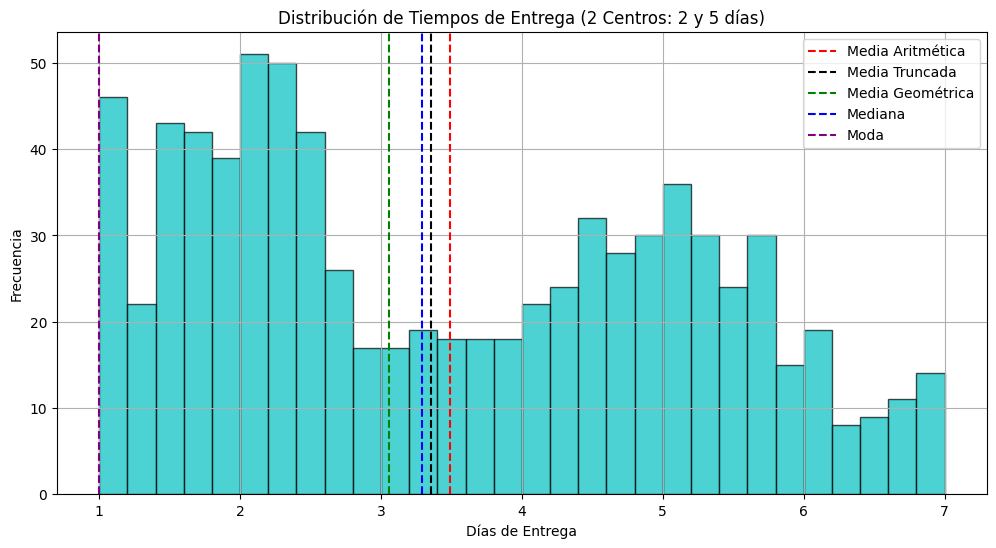

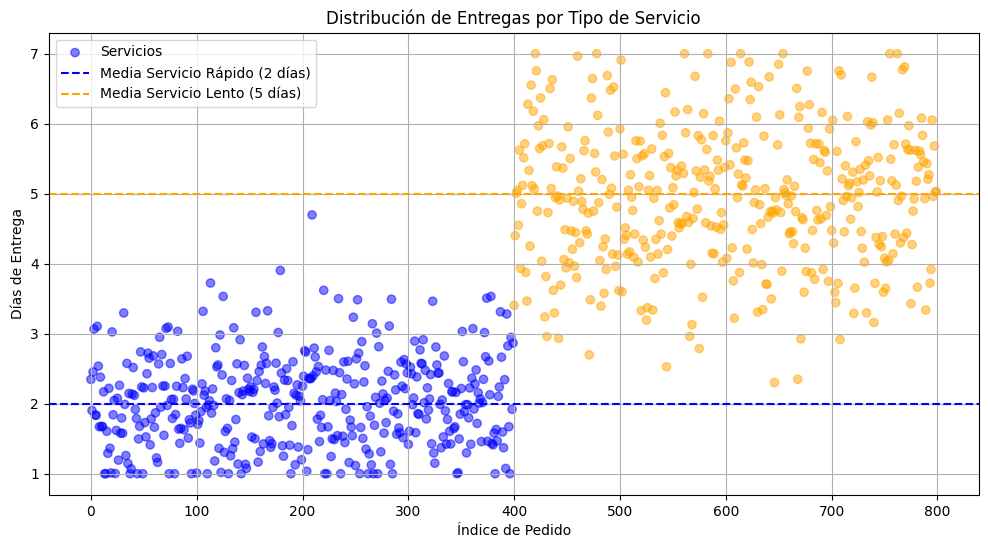

In [10]:
# GRAFICAMOS HISTOGRAMA PARA VER LAS DOS MEDIAS
plt.figure(figsize=(12, 6))
plt.hist(df["Días de Entrega"], bins=30, color='c', edgecolor='k', alpha=0.7)

# Líneas de estadísticos clave
plt.axvline(df["Días de Entrega"].mean(), color='red', linestyle='dashed', linewidth=1.5, label="Media Aritmética")
plt.axvline(trim_mean(df["Días de Entrega"], 0.25), color='black', linestyle='dashed', linewidth=1.5, label="Media Truncada")
plt.axvline(gmean(df["Días de Entrega"]), color='green', linestyle='dashed', linewidth=1.5, label="Media Geométrica")
plt.axvline(df["Días de Entrega"].median(), color='blue', linestyle='dashed', linewidth=1.5, label="Mediana")

# Moda
moda = mode(df["Días de Entrega"], keepdims=True).mode[0]
plt.axvline(moda, color='purple', linestyle='dashed', linewidth=1.5, label="Moda")

# Configuración final del histograma
plt.xlabel("Días de Entrega")
plt.ylabel("Frecuencia")
plt.title("Distribución de Tiempos de Entrega (2 Centros: 2 y 5 días)")
plt.legend()
plt.grid(True)

# GRAFICAMOS DISPERSIÓN PARA VER CÓMO SE AGRUPAN LOS SERVICIOS
plt.figure(figsize=(12, 6))
colores = {'Rápido': 'blue', 'Lento': 'orange'}
plt.scatter(df.index, df["Días de Entrega"], c=df["Tipo de Servicio"].map(colores), alpha=0.5, label="Servicios")

# Configuración final del gráfico de dispersión
plt.axhline(2, color='blue', linestyle='dashed', linewidth=1.5, label="Media Servicio Rápido (2 días)")
plt.axhline(5, color='orange', linestyle='dashed', linewidth=1.5, label="Media Servicio Lento (5 días)")
plt.xlabel("Índice de Pedido")
plt.ylabel("Días de Entrega")
plt.title("Distribución de Entregas por Tipo de Servicio")
plt.legend()
plt.grid(True)

# Mostrar gráficos
plt.show()


¿Por qué se usa np.clip() en este caso?
Como los tiempos de entrega en la vida real no pueden ser negativos ni absurdamente altos, usamos np.clip(entregas, 1, 7) para limitar los valores:

Si np.random.normal() genera un número menor a 1 día, lo reemplaza con 1.
Si genera un número mayor a 7 días, lo reemplaza con 7.
Esto simula la realidad donde una empresa de paquetería tiene un rango de entrega razonable.

---
---
---

# 2.3. Medidas de dispersión

---

Las **medidas de tendencia central** no son las únicas medidas de resumen estadístico que podemos calcular; otras medidas también de gran importancia son las **medidas de dispersión**. 

Las **medidas de dispersión**, también llamadas **medidas de variabilidad**, muestran la variabilidad de una distribución, indicando con un número qué tan alejados están los valores de la media.  

- **Mayor valor → Más variabilidad (datos dispersos)**
- **Menor valor → Datos más homogéneos**

---

### Principales Medidas de Dispersión

| **Medida** | **Fórmula** | **Descripción** |
|------------|------------|----------------|
| **Varianza (Variance)** | $$ \sigma^2 = \sum \limits_{i=1}^{N}\frac{(x_i-\mu)^2}{N} $$ | Indica qué tan dispersos están los datos respecto a la media. |
| **Desviación Estándar (Standard Deviation)** | $$ \sigma = \sqrt{\sum\limits_{i=1}^{N}\frac{(x_i-\bar{x})^2}{N-1}} $$ | Es la raíz cuadrada de la varianza, mide la dispersión en las mismas unidades de los datos. |
| **MAD (Desviación Absoluta de la Mediana; Median Absolute Deviation)** | $$ MAD = \text{median}(|X_i - \bar{X}|) $$ | Muestra la desviación respecto a la mediana, es robusto frente a valores extremos. |
| **Cuartiles (Quartiles)** | $$\begin{cases} Q1 = (N+1) \times \frac{1}{4} \\ Q2 = (N+1) \times \frac{2}{4} \\ Q3 = (N+1) \times \frac{3}{4} \end{cases}$$ | Divide los datos en 4 partes, mostrando dónde caen el 25%, 50% y 75% de los valores. |
| **Covarianza (Covariance)** | $$ COV(x,y) = \sum\limits_{i=1}^{N}\frac{(x_i-\bar{x})*(y_i-\bar{y})}{N-1} $$ | Mide la relación lineal entre dos variables. |
| **Coeficiente de Correlación de Pearson (Pearson Correlation Coefficient)** | $$ r_{x,y} = \frac{\sum \limits_{i=1}^{N}(x_i-\bar{x})*(y_i-\bar{y})}{\sqrt{\sum \limits_{i=1}^{N}(x_i-\bar{x})^{2}*(y_i-\bar{y})^{2}}}  $$ | Indica la fuerza y dirección de la relación lineal entre dos variables. Su valor oscila entre -1 y 1. |
| **Coeficiente de Correlación de Spearman (Spearman’s Rank Correlation Coefficient)** | $$ r_s = 1 - \frac{6 \sum d_i^2}{N(N^2 - 1)} $$ | Mide la relación entre dos variables en función de sus rangos. Se usa cuando la relación no es necesariamente lineal. |

#### Coeficiente de Correlación de Spearman (Spearman’s Rank Correlation Coefficient)

El coeficiente de correlación de **Spearman** es una medida de la relación entre dos variables basada en sus **rangos**, en lugar de sus valores originales. Se utiliza cuando la relación entre las variables no es necesariamente **lineal**, pero sí **monótona** (a medida que una variable aumenta, la otra también lo hace o disminuye consistentemente).

#### Fórmula:

$$ r_s = 1 - \frac{6 \sum d_i^2}{N(N^2 - 1)} $$

Donde:

- \( r_s \) → Es el coeficiente de correlación de Spearman.
- \( d_i \) → Es la **diferencia** entre los rangos de los valores $( d_i = \text{Rango}(x_i) - \text{Rango}(y_i) $.
- \( N \) → Es el número total de pares de datos.
  
---

### Explicación

Cada una de estas medidas nos ayuda a analizar **cómo varían los datos** dentro de una muestra o población.  
Veamos un ejemplo en **Python** para calcular cada una de ellas. 


In [11]:
import numpy as np
import pandas as pd
from scipy.stats import median_abs_deviation

# 🔹 Simulación de datos: Tiempos de entrega de paquetes en días
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)  # Promedio de 5 días, con desviación de 2 días
data = np.round(np.clip(data, 1, 10))  # Redondeamos y limitamos entre 1 y 10 días

# Convertimos a DataFrame
df = pd.DataFrame(data, columns=["Días de Entrega"])

# Cálculo de medidas de dispersión
varianza = np.var(data, ddof=1)  # Varianza muestral (ddof=1)
desviacion_estandar = np.std(data, ddof=1)  # Desviación estándar
mad = median_abs_deviation(data)  # MAD - Desviación absoluta de la mediana
q1, q2, q3 = np.percentile(data, [25, 50, 75])  # Cuartiles
covarianza = np.cov(data, data)[0, 1]  # Covarianza con sí mismo
coef_corr = np.corrcoef(data, data)[0, 1]  # Coeficiente de correlación (autocorrelación)

# Crear DataFrame con los resultados
resultados_dispersion = pd.DataFrame({
    "Varianza": [varianza],
    "Desviación Estándar": [desviacion_estandar],
    "MAD": [mad],
    "Cuartil 1 (Q1)": [q1],
    "Mediana (Q2)": [q2],
    "Cuartil 3 (Q3)": [q3],
    "Covarianza": [covarianza],
    "Coef. Correlación": [coef_corr]
})

# Mostrar resultados
resultados_dispersion


,Varianza,Desviación Estándar,MAD,Cuartil 1 (Q1),Mediana (Q2),Cuartil 3 (Q3),Covarianza,Coef. Correlación
0,3.340909,1.827815,1.0,4.0,5.0,6.0,3.340909,1.0


Aquí tienes una explicación súper breve para cada medición, basada en los resultados:

  - **Varianza (3.34)** → Los tiempos de entrega tienen cierta dispersión alrededor del promedio, pero no son extremadamente variables.
    
  - **Desviación Estándar (1.83)** → En promedio, los tiempos de entrega varían alrededor de 1.83 días con respecto a la media.
  - **MAD (1.0)** → La mayoría de los tiempos de entrega están a 1 día de diferencia de la mediana, lo que indica poca dispersión extrema.
  - **Cuartil 1 (4.0)** → El 25% de los pedidos llegan en 4 días o menos.
  - **Mediana (5.0)** → El 50% de los pedidos llegan en 5 días o menos (valor central).
  - **Cuartil 3 (6.0)** → El 75% de los pedidos llegan en 6 días o menos.
  - **Covarianza (3.34)** → Se compara la variabilidad consigo misma, así que coincide con la varianza.
  - **Coeficiente de Correlación (1.0)** → Como se comparó la variable consigo misma, la correlación es perfecta (1.0).
En resumen: Los tiempos de entrega son relativamente consistentes, con una variabilidad moderada entre 4 y 6 días para la mayoría de los pedidos. 🚀📦

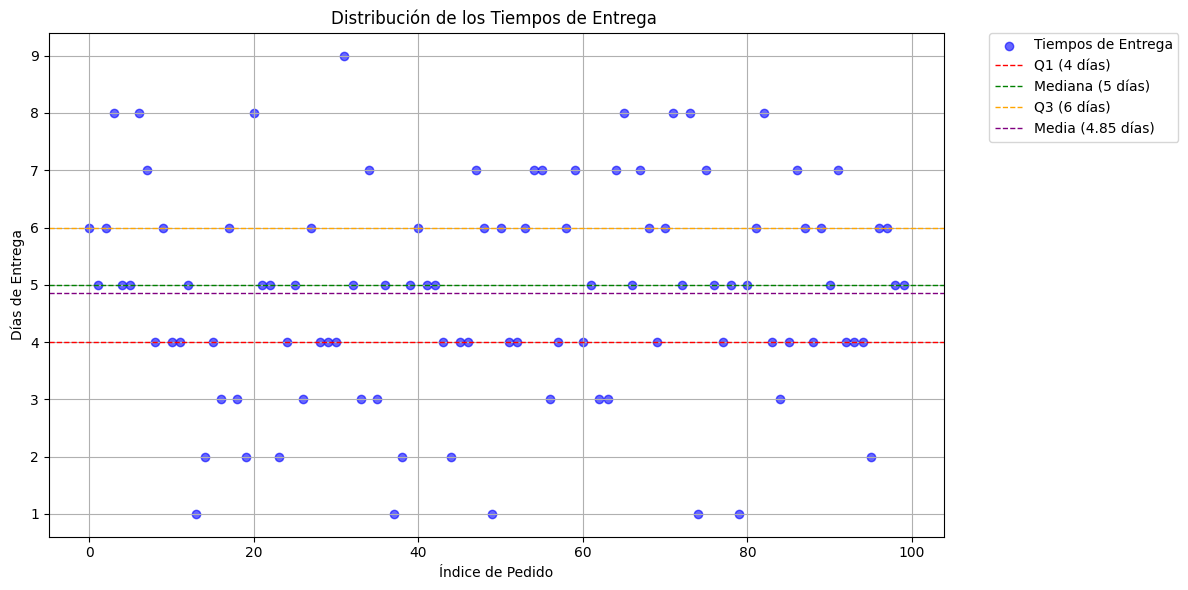

In [12]:
# 🔹 Scatterplot con la leyenda fuera de la imagen
plt.figure(figsize=(12, 6))
plt.scatter(range(len(data)), data, alpha=0.6, color="blue", label="Tiempos de Entrega")
plt.axhline(q1, color='red', linestyle='dashed', linewidth=1, label="Q1 ({} días)".format(int(q1)))
plt.axhline(q2, color='green', linestyle='dashed', linewidth=1, label="Mediana ({} días)".format(int(q2)))
plt.axhline(q3, color='orange', linestyle='dashed', linewidth=1, label="Q3 ({} días)".format(int(q3)))
plt.axhline(np.mean(data), color='purple', linestyle='dashed', linewidth=1, label="Media ({} días)".format(round(np.mean(data), 2)))

plt.xlabel("Índice de Pedido")
plt.ylabel("Días de Entrega")
plt.title("Distribución de los Tiempos de Entrega ")

#  Mover la leyenda fuera de la imagen
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

#  Ajustar layout para evitar recortes
plt.tight_layout()

# Mostrar gráfico
plt.show()


Vamos a retomar el dataset faithful, el cual consiste en una colección de observaciones sobre las erupciones del géiser Old Faithful.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
%matplotlib inline 

faithful = data('faithful')
faithful

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
...,...,...
268,4.117,81
269,2.150,46
270,4.417,90
271,1.817,46


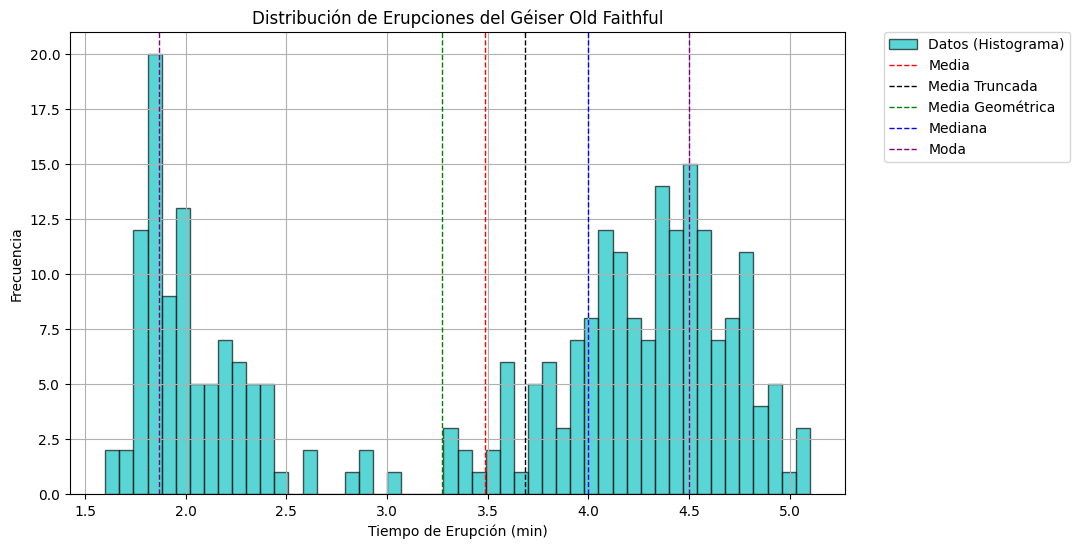

In [14]:
# Extraer la columna de erupciones
x = faithful['eruptions']

# Crear figura
plt.figure(figsize=(10, 6))

# Graficar el histograma
plt.hist(x, bins=50, color='c', edgecolor='k', alpha=0.65, label="Datos (Histograma)")

# Agregar líneas de medidas estadísticas con etiquetas
plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=1, label="Media")
plt.axvline(trim_mean(x, 0.25), color='black', linestyle='dashed', linewidth=1, label="Media Truncada")
plt.axvline(gmean(x), color='green', linestyle='dashed', linewidth=1, label="Media Geométrica")
plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=1, label="Mediana")

# Moda (manejo de múltiples modas)
a = x.mode().astype(float)
if len(a) > 0:
    plt.axvline(a[0], color='purple', linestyle='dashed', linewidth=1, label="Moda")
    if len(a) > 1:
        plt.axvline(a[1], color='purple', linestyle='dashed', linewidth=1)

# Configurar leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Etiquetas y título
plt.xlabel("Tiempo de Erupción (min)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Erupciones del Géiser Old Faithful")
plt.grid(True)

# Mostrar gráfico
plt.show()


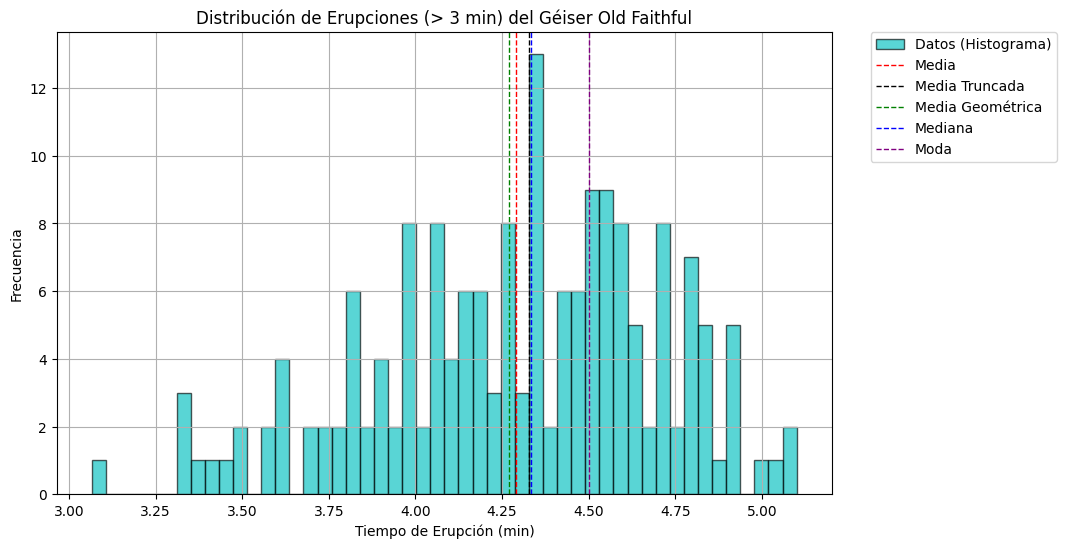

In [15]:
# Filtrar valores donde 'eruptions' > 3.0
y = faithful[faithful['eruptions'] > 3.0]

# Extraer la columna filtrada
x = y['eruptions']

# Crear figura
plt.figure(figsize=(10, 6))

# Graficar el histograma
plt.hist(x, bins=50, color='c', edgecolor='k', alpha=0.65, label="Datos (Histograma)")

# Agregar líneas de medidas estadísticas con etiquetas
plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=1, label="Media")
plt.axvline(trim_mean(x, 0.25), color='black', linestyle='dashed', linewidth=1, label="Media Truncada")
plt.axvline(gmean(x), color='green', linestyle='dashed', linewidth=1, label="Media Geométrica")
plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=1, label="Mediana")

# Moda (manejo de una moda)
a = x.mode().astype(float)
if len(a) > 0:
    plt.axvline(a[0], color='purple', linestyle='dashed', linewidth=1, label="Moda")

# Configurar leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Etiquetas y título
plt.xlabel("Tiempo de Erupción (min)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Erupciones (> 3 min) del Géiser Old Faithful")
plt.grid(True)

# Mostrar gráfico
plt.show()


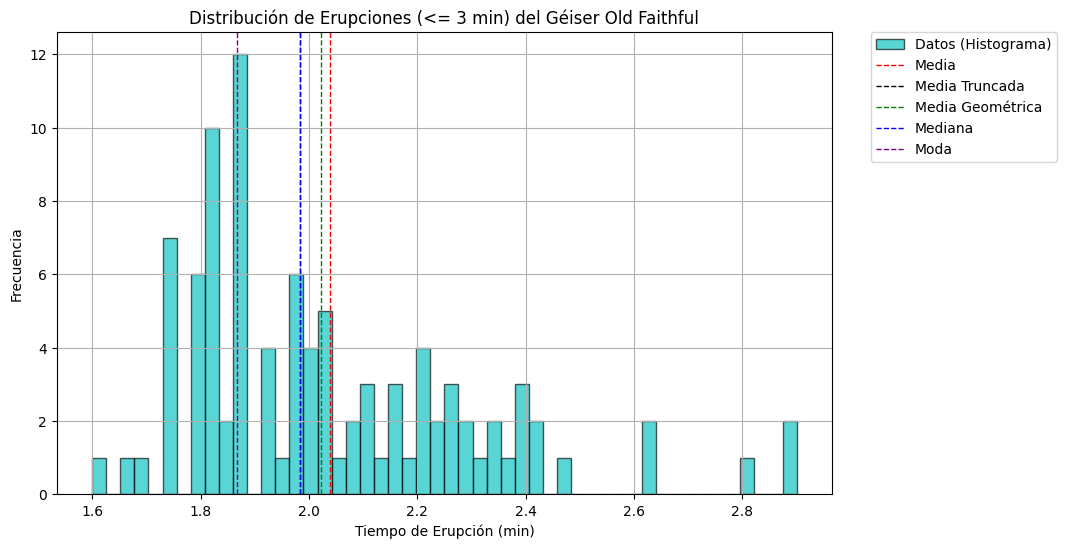

In [16]:
# Filtrar valores donde 'eruptions' > 3.0
z = faithful[faithful['eruptions'] <= 3.0]

# Extraer la columna filtrada
x = z['eruptions']

# Crear figura
plt.figure(figsize=(10, 6))

# Graficar el histograma
plt.hist(x, bins=50, color='c', edgecolor='k', alpha=0.65, label="Datos (Histograma)")

# Agregar líneas de medidas estadísticas con etiquetas
plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=1, label="Media")
plt.axvline(trim_mean(x, 0.25), color='black', linestyle='dashed', linewidth=1, label="Media Truncada")
plt.axvline(gmean(x), color='green', linestyle='dashed', linewidth=1, label="Media Geométrica")
plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=1, label="Mediana")

# Moda (manejo de una moda)
a = x.mode().astype(float)
if len(a) > 0:
    plt.axvline(a[0], color='purple', linestyle='dashed', linewidth=1, label="Moda")

# Configurar leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Etiquetas y título
plt.xlabel("Tiempo de Erupción (min)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Erupciones (<= 3 min) del Géiser Old Faithful")
plt.grid(True)

# Mostrar gráfico
plt.show()


Un gráfico relacionado a los cuartiles y describe varias características importantes al mismo tiempo, tales como la dispersión y simetría es el diagrama de caja.

Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Podemos utilizar la función boxplot de Seaborn para generarlo.

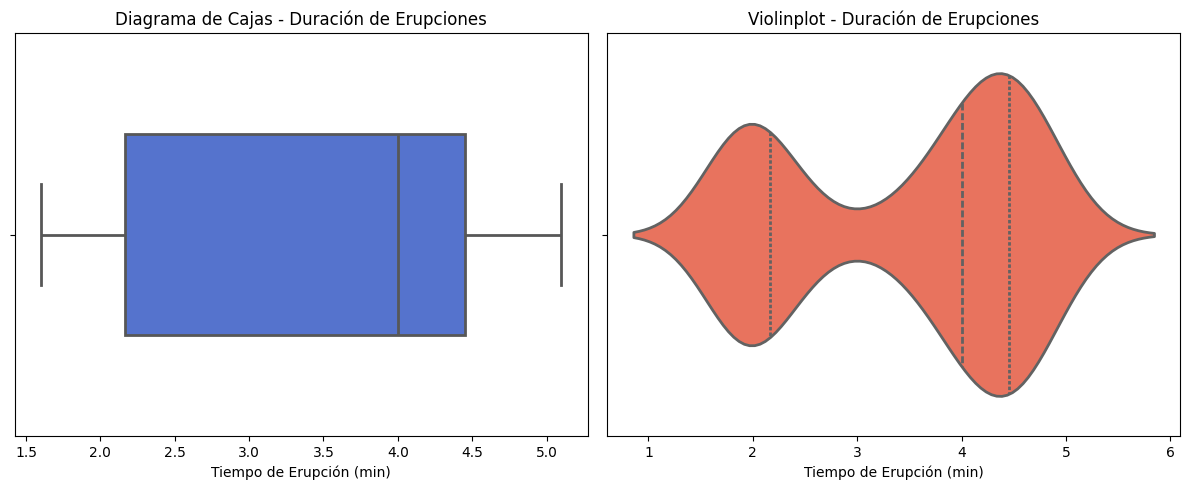

In [17]:
# Crear figura
plt.figure(figsize=(12, 5))

# Subgráfico 1: Boxplot de duración de erupciones
plt.subplot(1, 2, 1)
sns.boxplot(x=faithful['eruptions'], color="royalblue", width=0.5, fliersize=5, linewidth=2)
plt.title("Diagrama de Cajas - Duración de Erupciones", fontsize=12)
plt.xlabel("Tiempo de Erupción (min)", fontsize=10)

# Subgráfico 2: Violinplot de duración de erupciones
plt.subplot(1, 2, 2)
sns.violinplot(x=faithful['eruptions'], color="tomato", linewidth=2, inner="quartile")
plt.title("Violinplot - Duración de Erupciones", fontsize=12)
plt.xlabel("Tiempo de Erupción (min)", fontsize=10)

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()


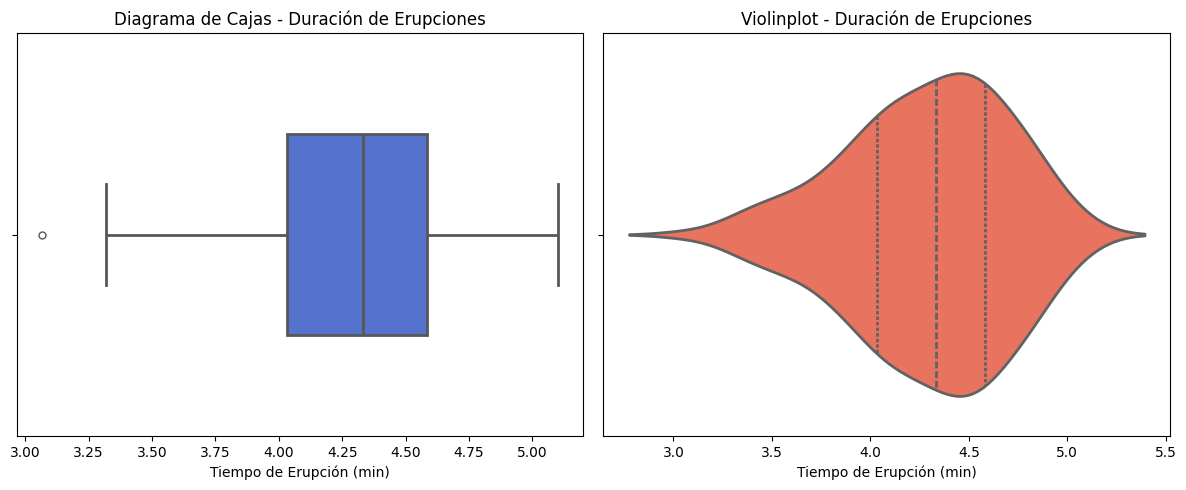

In [18]:
# Crear figura
plt.figure(figsize=(12, 5))

# Subgráfico 1: Boxplot de duración de erupciones
plt.subplot(1, 2, 1)
sns.boxplot(x=y['eruptions'], color="royalblue", width=0.5, fliersize=5, linewidth=2)
plt.title("Diagrama de Cajas - Duración de Erupciones", fontsize=12)
plt.xlabel("Tiempo de Erupción (min)", fontsize=10)

# Subgráfico 2: Violinplot de duración de erupciones
plt.subplot(1, 2, 2)
sns.violinplot(x=y['eruptions'], color="tomato", linewidth=2, inner="quartile")
plt.title("Violinplot - Duración de Erupciones", fontsize=12)
plt.xlabel("Tiempo de Erupción (min)", fontsize=10)

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()


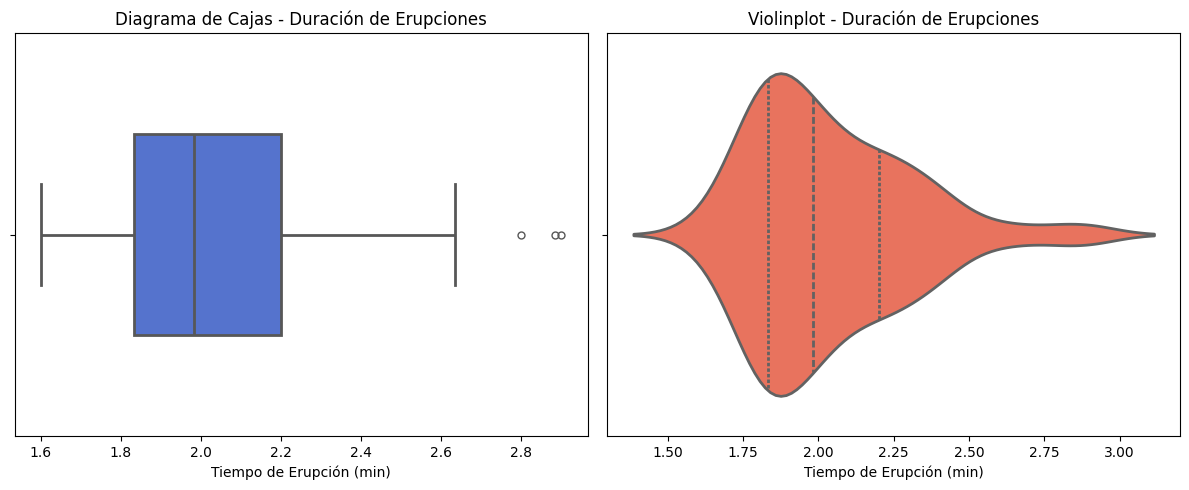

In [19]:
# Crear figura
plt.figure(figsize=(12, 5))

# Subgráfico 1: Boxplot de duración de erupciones
plt.subplot(1, 2, 1)
sns.boxplot(x=z['eruptions'], color="royalblue", width=0.5, fliersize=5, linewidth=2)
plt.title("Diagrama de Cajas - Duración de Erupciones", fontsize=12)
plt.xlabel("Tiempo de Erupción (min)", fontsize=10)

# Subgráfico 2: Violinplot de duración de erupciones
plt.subplot(1, 2, 2)
sns.violinplot(x=z['eruptions'], color="tomato", linewidth=2, inner="quartile")
plt.title("Violinplot - Duración de Erupciones", fontsize=12)
plt.xlabel("Tiempo de Erupción (min)", fontsize=10)

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()


## Regresiones
---
Las regresiones es una de las herramientas principales de la estadistica inferencial. El objetivo del análisis de regresión es describir la relación entre un conjunto de variables, llamadas **variables dependientes**, y otro conjunto de variables, llamadas **variables independientes o explicativas**. 

$$ Y = \alpha + \beta * X$$

Más específicamente, el análisis de regresión ayuda a entender cómo el valor típico de la variable dependiente cambia cuando cualquiera de las variables independientes es cambiada, mientras que se mantienen las otras variables independientes fijas.

---

El producto final del análisis de regresión es la estimación de una función de las variables independientes llamada la función de regresión. 

**La idea es que con base a esta función de regresión podamos hacer estimaciones sobre eventos futuros**.

---
La regresión lineal es una de las técnicas más simples y mayormente utilizadas en los análisis de regresiones.

---
Uno de los métodos más populares para realizar regresiones lineales es el de mínimos cuadrados ordinarios ([OLS](https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc), por sus siglas en inglés), este método es el estimador más simple y común en la que los dos βs se eligen para minimizar el cuadrado de la distancia entre los valores estimados y los valores reales.

---
## Mínimos Cuadrados Ordinario (OLS)

### Residuos y la Suma de sus Cuadrados
Para ejemplificar, volvamos a una variable independiente. El **ajuste óptimo** se puede determinar de varias formas, pero la manera más común (y la utilizada por `Scikit-Learn`) es mediante el **método de OLS**, el cual minimiza una cantidad denominada *suma de cuadrados de los residuos* (RSS):

\begin{align}
Minimizar\ RSS(\hat{\beta_0},\hat{\beta_1}) &= \sum_{i=1}^n [y_i - (\hat{\beta_0}+\hat{\beta_1} x_i)]^2,\\
\end{align}

en esta ecuación el **residuo** corresponde al valor $e_i$, tal que $e_i=y_i - (\hat{\beta_0}+\hat{\beta_1} x_i)$. Geométricamente, un residuo es la distancia vertical entre la **linea ajustada** y el valor real $y_i$.

Otra precisión importante, es que OLS produce estimados de los parámetros, es decir que se obtienen $\hat{\beta_0}$ y $\hat{\beta_1}$, y no los verdaderos $\beta_0$ y $\beta_1$.

-------

<h2>Simulando datos: Gasto en Publicidad y Ventas</h2>
Usaremos datos simulados donde X representa el gasto en publicidad y Y representa las ventas generadas.

Suposición: A mayor inversión en publicidad, mayores ventas.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# 🔹 Simulación de datos
np.random.seed(42)
n = 100  # Número de observaciones

gasto_publicidad = np.random.uniform(1000, 5000, n)  # Publicidad en USD
ventas = 2000 + 3.5 * gasto_publicidad + np.random.normal(0, 5000, n)  # Ventas con ruido

# Convertimos a DataFrame
df = pd.DataFrame({"Publicidad (USD)": gasto_publicidad, "Ventas (USD)": ventas})
df.head(5)

,Publicidad (USD),Ventas (USD)
0,2498.160475,11178.797005
1,4802.857226,17314.963537
2,3927.975767,16206.719068
3,3394.633937,3943.374206
4,1624.074562,6585.901527


### Ajuste del modelo de Regresión Lineal (OLS)
OLS encuentra la mejor línea recta que minimiza la suma de los errores al cuadrado.

In [21]:
# Agregamos una constante para el intercepto
X = sm.add_constant(gasto_publicidad)
y = ventas

# Ajustamos el modelo OLS
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     58.30
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           1.51e-11
Time:                        22:27:02   Log-Likelihood:                -982.87
No. Observations:                 100   AIC:                             1970.
Df Residuals:                      98   BIC:                             1975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3650.1973   1193.240      3.059      0.0

## Explicación de los Resultados de la Regresión OLS

El resumen generado por `statsmodels` en Python nos proporciona información clave sobre el ajuste del modelo de regresión lineal. A continuación, se describe cada uno de los elementos en la tabla.

---

### **1. Información General del Modelo**
| Elemento               | Descripción |
|------------------------|-------------|
| **Dep. Variable** (`y`) | Es la variable dependiente que estamos tratando de predecir, en este caso, las ventas. |
| **Model** (`OLS`)      | Indica que estamos utilizando el método de **Mínimos Cuadrados Ordinarios (OLS)**. |
| **Method** (`Least Squares`) | Confirma que el método de ajuste es el de mínimos cuadrados, minimizando los errores cuadráticos. |
| **Date y Time**        | Indican la fecha y hora en la que se realizó la regresión. |
| **No. Observations** (`100`) | Número total de observaciones en el dataset (100 puntos de datos). |
| **Df Residuals** (`98`) | Grados de libertad de los residuos. Se calcula como `n - k - 1`, donde `n` es el número de observaciones y `k` el número de variables predictoras. |
| **Df Model** (`1`)     | Grados de libertad del modelo. En este caso, solo hay una variable independiente (`x1`). |
| **Covariance Type** (`nonrobust`) | Especifica cómo se han calculado las covarianzas de los errores. "Nonrobust" indica que no se han aplicado correcciones para heterocedasticidad. |

Nota: La heterocedasticidad es un fenómeno en modelos de regresión donde la varianza del error no es constante a lo largo de los valores de la variable independiente. Es decir, la dispersión de los errores cambia en diferentes niveles de la variable predictora.

---

### **2. Calidad del Ajuste del Modelo**
| Elemento               | Descripción |
|------------------------|-------------|
| **R-squared** (`0.373`) | Representa qué proporción de la variabilidad de la variable dependiente (ventas) es explicada por la variable independiente (publicidad). En este caso, el 37.3% de la variabilidad en las ventas se explica por el gasto en publicidad. |
| **Adj. R-squared** (`0.367`) | Es una versión ajustada de `R²` que penaliza el número de predictores en el modelo. Es útil cuando hay múltiples variables independientes. |
| **F-statistic** (`58.30`) | Prueba si al menos una variable independiente tiene un coeficiente distinto de cero. Un valor alto indica que el modelo es significativo. |
| **Prob (F-statistic)** (`1.51e-11`) | Es el **p-valor** asociado al estadístico `F`. Un valor muy bajo indica que el modelo es significativo y que la variable independiente tiene un impacto en la variable dependiente. |


Nota: Penalizar significa castigar un modelo si usa cosas innecesarias.
Nos ayuda a hacer modelos que entiendan los datos, en lugar de solo memorizarlos.
Se usa en estadística y machine learning para evitar errores y hacer mejores predicciones.

---

### 3. Medidas de Comparación de Modelos

| **Elemento** | **Descripción** |
|-------------|----------------|
| **Log-Likelihood** (`-982.87`) | Mide qué tan probable es el modelo dado el conjunto de datos. Cuanto mayor sea (menos negativo), mejor el ajuste. |
| **AIC (Akaike Information Criterion)** (`1970`) | Penaliza modelos más complejos. Cuanto menor sea, mejor es el modelo en términos de balance entre ajuste y simplicidad. |
| **BIC (Bayesian Information Criterion)** (`1975`) | Similar a AIC, pero con una penalización mayor para modelos con muchas variables. Se usa para comparar modelos: cuanto menor, mejor. |

---

### 4. Coeficientes del Modelo
### **Explicación de los Coeficientes**
- **`const (β₀)`** → Es el **intercepto**, que indica las ventas esperadas cuando el gasto en publicidad es cero.
- **`x1 (β₁)`** → Es la **pendiente**, que indica cuánto aumentan las ventas por cada dólar adicional en publicidad.
- **`std err`** → Mide la variabilidad del coeficiente estimado.
- **`t-valor`** → Evalúa si el coeficiente es significativamente diferente de 0.
- **`p-valor (P>|t|)`** → Si es menor a 0.05, el coeficiente es estadísticamente significativo.
- **`IC 95%`** → Intervalo de confianza al 95% para el coeficiente.


---

### **5. Pruebas de Normalidad y Diagnóstico**

| Elemento               | Descripción |
|------------------------|-------------|
| **Omnibus (`0.900`)** | Prueba de normalidad de los residuos. Valores cercanos a 0 indican normalidad. |
| **Prob(Omnibus) (`0.638`)** | P-valor de la prueba Omnibus. Un valor mayor a 0.05 sugiere que los residuos son normales. |
| **Jarque-Bera (`0.808`)** | Otra prueba de normalidad en los residuos. Valores cercanos a 0 indican normalidad. |
| **Prob(JB) (`0.668`)** | P-valor de la prueba Jarque-Bera. Mayor a 0.05 sugiere residuos normales. |
| **Skew (`0.217`)** | Mide la asimetría de los residuos. Valores cercanos a 0 indican simetría. |
| **Kurtosis (`2.929`)** | Mide qué tan "afilada" es la distribución de los residuos en comparación con una normal (idealmente 3). |
| **Durbin-Watson (`2.285`)** | Detecta **autocorrelación** en los residuos. Valores cercanos a 2 indican independencia. |
| **Cond. No. (`8.19e+03`)** | Detecta **multicolinealidad**. Valores altos indican posible correlación fuerte entre variables predictoras. |

---


### Graficando la Regresión Lineal
Se grafica la relación entre publicidad y ventas junto con la línea de regresión.

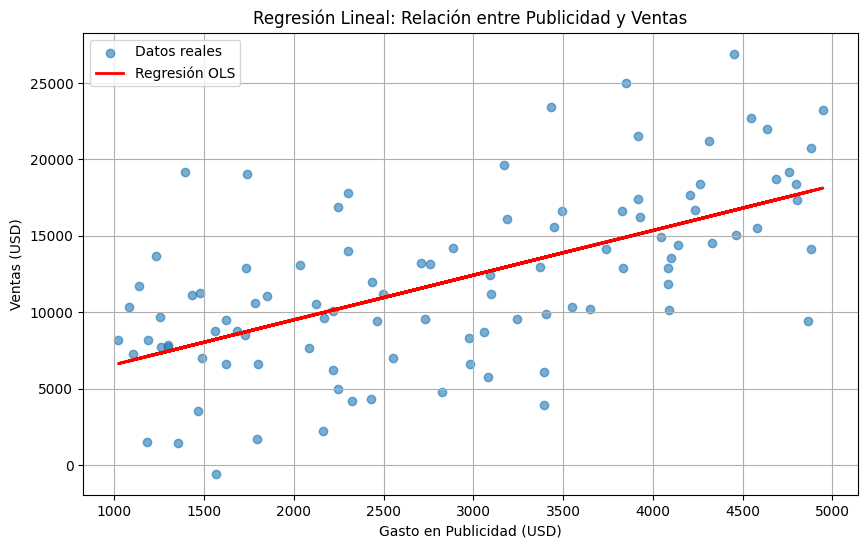

In [22]:
# Predicciones del modelo
predicciones = modelo.predict(X)

# Gráfico de la regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(gasto_publicidad, ventas, alpha=0.6, label="Datos reales")
plt.plot(gasto_publicidad, predicciones, color="red", linewidth=2, label="Regresión OLS")
plt.xlabel("Gasto en Publicidad (USD)")
plt.ylabel("Ventas (USD)")
plt.title("Regresión Lineal: Relación entre Publicidad y Ventas")
plt.legend()
plt.grid(True)
plt.show()


### Gráfico de Residuos
Los residuos son las diferencias entre los valores reales y los valores predichos. Se grafican para analizar la validez del modelo.

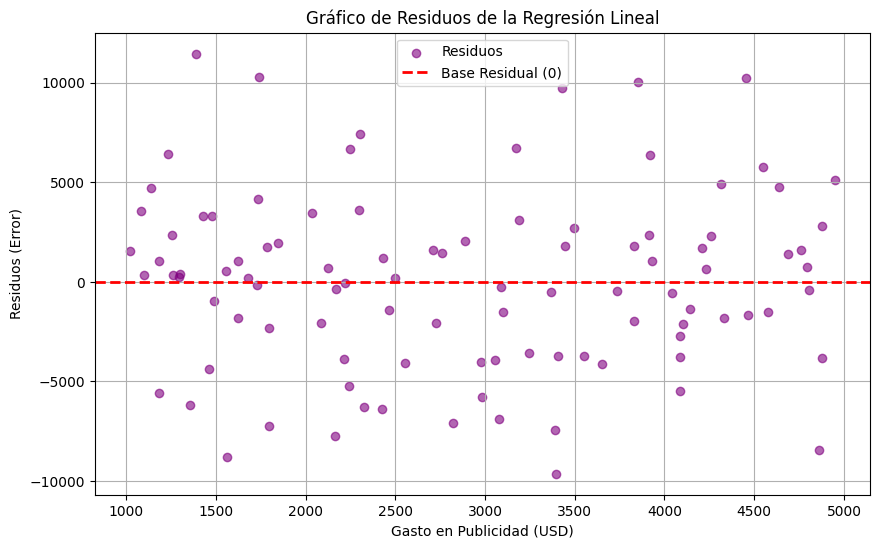

In [23]:
# Calculamos los residuos
residuos = ventas - predicciones

# Gráfico de Residuos
plt.figure(figsize=(10, 6))
plt.scatter(gasto_publicidad, residuos, alpha=0.6, color="purple", label="Residuos")
plt.axhline(0, color="red", linestyle="dashed", linewidth=2, label="Base Residual (0)")
plt.xlabel("Gasto en Publicidad (USD)")
plt.ylabel("Residuos (Error)")
plt.title("Gráfico de Residuos de la Regresión Lineal")
plt.legend()
plt.grid(True)
plt.show()


## **Conclusión**
Este resumen proporciona un análisis detallado de la regresión lineal:
1. **El modelo es estadísticamente significativo**, ya que el p-valor del estadístico `F` es muy bajo (`1.51e-11`). Esto significa que hay una probabilidad extremadamente baja de que esta relación entre publicidad y ventas sea aleatoria. En otras palabras, el modelo es válido y la publicidad sí tiene un efecto en las ventas.
2. **El coeficiente de publicidad (`2.92`) indica que cada dólar adicional en publicidad aumenta las ventas en promedio en 2.92 dólares.**
3. **El R² es 0.373**, lo que sugiere que el modelo explica el 37.3% de la variabilidad en las ventas. Esto indica que hay otros factores influyendo en las ventas.
4. **Las pruebas de normalidad de los residuos (Omnibus y Jarque-Bera) sugieren que los residuos siguen una distribución normal.**
5. **El estadístico Durbin-Watson (`2.285`) indica que no hay autocorrelación significativa en los residuos,** es decir, el modelo no está sesgado por patrones ocultos en los datos.

Si se quiere mejorar el modelo, se podrían considerar más variables, como el **precio del producto, competencia o estacionalidad**.

---


### Conclusión General

#### Lo bueno del modelo:
- Es **estadísticamente significativo**.
- La **publicidad sí tiene un impacto positivo** en las ventas.
- Los **residuos parecen distribuirse de manera aceptable**.

#### Limitaciones del modelo:
- **R² bajo (0.373)** → Solo explica una parte pequeña de la variabilidad en ventas.
- **Otros factores deben incluirse** para mejorar la predicción (precio, competencia, calidad del producto, etc.).

#### ¿Es un modelo decente?
**Sí, pero con limitaciones.**
- Si solo queremos saber si **la publicidad impacta las ventas**, el modelo es **válido y significativo**.
- Si queremos **predecir con precisión las ventas**, el modelo **no es suficiente** y necesita más variables.

#### Recomendación:
Para mejorar el modelo, podríamos agregar más variables, como:
- **Precio de los productos**  
- **Competencia en el mercado**  
- **Temporadas de ventas**  
- **Estrategias de marketing digital**  


---
---
---
<h1><center>Referencias y links de interés</center></h1>

---

* Algunos conceptos de [estadística](https://towardsdatascience.com/introduction-to-statistics-in-python-6f5a8876c994)
  * [Tendencia central](https://es.wikipedia.org/wiki/Medidas_de_tendencia_central)
  * [Dispersión](https://es.wikipedia.org/wiki/Medidas_de_dispersi%C3%B3n)
* [Correlaciones](https://cienciadedatos.net/documentos/24_correlacion_y_regresion_lineal)
* [Análisis de Correlación y Regresión](https://www.mcgraw-hill.com.mx/pye01e/cap13/13analisis_de_correlacion_y_regresion.pdf)